In [1]:
import json
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def json_file(filename):
    with open(filename) as data_file:
        df = pd.read_json(data_file)
    return df

In [3]:
def merge_dataframes():
    tweets_df = pd.DataFrame()
    directory = '/home/ss6/downloads/BLM'
    for filename in os.listdir(directory):
        if filename != "tokenized_tweets.txt":
            f = os.path.join(directory, filename)
            # checking if it is a file
            if os.path.isfile(f):
                df = json_file(f)
                frames = [tweets_df,df]
                tweets_df = pd.concat(frames)
    return tweets_df

In [4]:
tweets = merge_dataframes()

In [5]:
def create_corpus():
    corpus = []
    directory = '/home/ss6/downloads/BLM'
    for file_name in os.listdir(directory):
        if file_name != "tokenized_tweets.txt":
            f = os.path.join(directory, file_name)
            with open(f) as data_file:    
                data = json.load(data_file)
                for i in data:
                    corpus.append(i["text"].lower())
    return corpus

In [6]:
def create_corpus_month_dict():
    corpus_dict = {}
    directory = '/home/ss6/downloads/BLM'
    for file_name in os.listdir(directory):
        if file_name != "tokenized_tweets.txt":
            f = os.path.join(directory, file_name)
            with open(f) as data_file:    
                data = json.load(data_file)
                for i in data:
                    date = i["created_at"].split(" ")[0]
                    split_date = date.split("-")
                    month_year = split_date[0]+"-"+split_date[1]
                    if month_year in corpus_dict:
                        corpus_dict[month_year].append(i['text'].lower())
                    else:
                        corpus_dict[month_year] = [i['text'].lower()]
    return corpus_dict

In [7]:
corpus = create_corpus()

In [8]:
len(corpus)

11600000

In [9]:
corpus_by_month = create_corpus_month_dict()

In [10]:
len(corpus_by_month)

25

In [11]:
num_tweets = []
for months in corpus_by_month:
    num_tweets.append(len(corpus_by_month[months]))

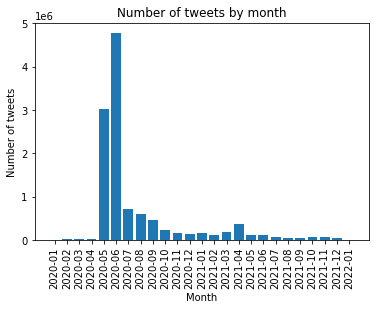

In [12]:
x = corpus_by_month.keys()
y = num_tweets
plt.bar(x, y)
plt.xlabel("Month")
plt.ylabel("Number of tweets")
plt.title("Number of tweets by month")
plt.xticks(rotation = 90)
plt.show()

In [13]:
tweets.head()

,id,created_at,user,text,hashtags,retweets,favorites,replies,quotes
0,1219483520185389056,2020-01-21 04:55:02+00:00,Squall_70,🤜💥#ReleaseTheSnyderCut💥🤛 \n🤜💥#ReleaseTheAyerCu...,"[releasethesnydercut, releasetheayercut, justi...",1,1,0,0
1,1219483804248657920,2020-01-21 04:56:10+00:00,lukeperez12,"Never spoke against the #Republicans, always s...","[republicans, democrats, facts, malcolmx, malc...",0,0,0,0
2,1219484485219053568,2020-01-21 04:58:52+00:00,OwlsPriority,https://t.co/tHzmjm5xMt\nImmigration #News 🇨🇦\...,"[news, ontario, employer, immigrants, increase...",0,0,0,0
3,1219484684968759296,2020-01-21 04:59:40+00:00,Squall_70,🤜💥#ReleaseTheSnyderCut💥🤛 \n🤜💥#ReleaseTheAyerCu...,"[releasethesnydercut, releasetheayercut, justi...",1,1,0,0
4,1219486545889067008,2020-01-21 05:07:04+00:00,beckybuck,@debidevens @RepDLesko @Tea_Party_Chris @realD...,"[democrat, justiceforall, votethemout, dts, ka...",0,3,1,0


In [14]:
tweets_cleaned_columns = tweets.drop(columns=['id', 'created_at', 'user','retweets','favorites','replies','quotes'], axis=1).sample(100000)

In [16]:
tweets_cleaned_columns['text_processed'] = tweets_cleaned_columns['text'].map(lambda x: re.sub(r"@[A-Za-z0-9_]+", '', x))

In [17]:
tweets_cleaned_columns['text_processed'] = tweets_cleaned_columns['text_processed'].map(lambda x: re.sub(r"(http)[^\s]+", '', x))

In [19]:
# Convert the titles to lowercase
tweets_cleaned_columns['text_processed'] = tweets_cleaned_columns['text_processed'].map(lambda x: x.lower())

In [20]:
# Print out the first rows of papers
tweets_cleaned_columns['text_processed'].head()

36799    rapaz do céu, eu fiquei fora hoje e cheguei e ...
31859                                    #blacklivesmatter
5471            \njustice will be served! we are not do...
7728      no justice no peace #vidasnegrasimportam     ...
17738     #iamasuburbanmom and i brought my kid to the ...
Name: text_processed, dtype: object

In [21]:
from wordcloud import WordCloud

In [22]:
# Join the different processed titles together.
long_string = ','.join(list(tweets_cleaned_columns['text_processed'].values))

In [23]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [24]:
# Generate a word cloud
wordcloud.generate(long_string)

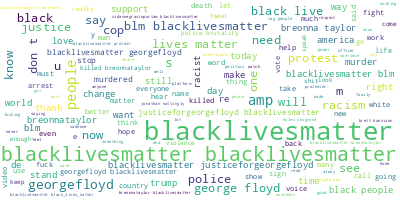

In [25]:
# Visualize the word cloud
wordcloud.to_image()

In [26]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/ss6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stop_words = stopwords.words('english')

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [29]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [30]:
data = tweets_cleaned_columns.text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [31]:
# remove stop words
data_words = remove_stopwords(data_words)

In [35]:
import gensim.corpora as corpora

In [36]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

In [37]:
# Create Corpus
texts = data_words

In [38]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [39]:
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


In [40]:
from pprint import pprint

In [41]:
# number of topics
num_topics = 8

In [42]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

In [43]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"georgefloyd" + 0.013*"black" + 0.010*"people" + '
  '0.009*"breonnataylor" + 0.008*"police" + 0.007*"justice" + 0.007*"amp" + '
  '0.006*"blm" + 0.006*"us" + 0.006*"white"'),
 (1,
  '0.014*"georgefloyd" + 0.012*"de" + 0.010*"blm" + 0.007*"police" + '
  '0.007*"people" + 0.006*"black" + 0.006*"amp" + 0.006*"la" + 0.004*"stand" + '
  '0.004*"en"'),
 (2,
  '0.025*"black" + 0.009*"breonnataylor" + 0.009*"matter" + 0.009*"lives" + '
  '0.008*"police" + 0.008*"people" + 0.006*"georgefloyd" + 0.005*"racism" + '
  '0.005*"blm" + 0.005*"america"'),
 (3,
  '0.012*"people" + 0.008*"black" + 0.007*"que" + 0.007*"georgefloyd" + '
  '0.006*"de" + 0.006*"get" + 0.006*"matter" + 0.005*"lives" + '
  '0.005*"sayhername" + 0.004*"justice"'),
 (4,
  '0.011*"please" + 0.010*"breonnataylor" + 0.009*"amp" + 0.007*"people" + '
  '0.007*"see" + 0.006*"trump" + 0.006*"police" + 0.006*"georgefloyd" + '
  '0.006*"still" + 0.006*"black"'),
 (5,
  '0.011*"breonnataylor" + 0.011*"black" + 0.011*"peopl

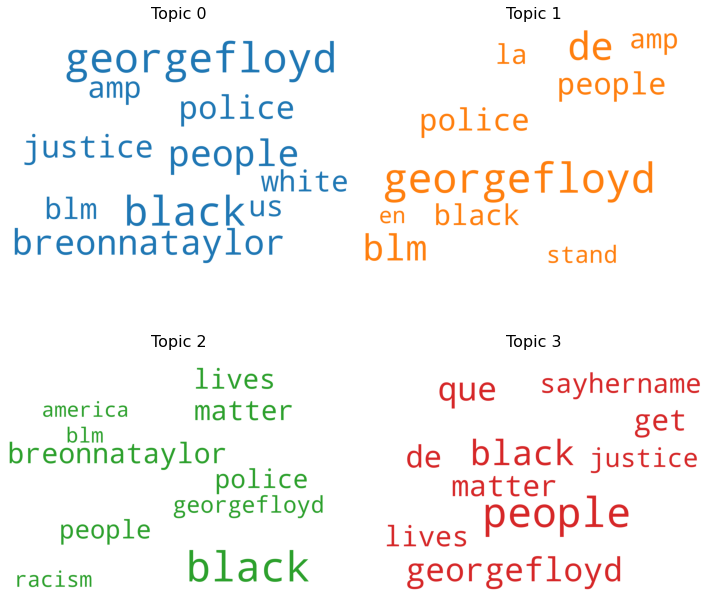

In [61]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1004301/2477205296.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipykernel_1004301/2477205296.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipykernel_1004301/2477205296.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/tmp/ipykernel_1004301/2477205296.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


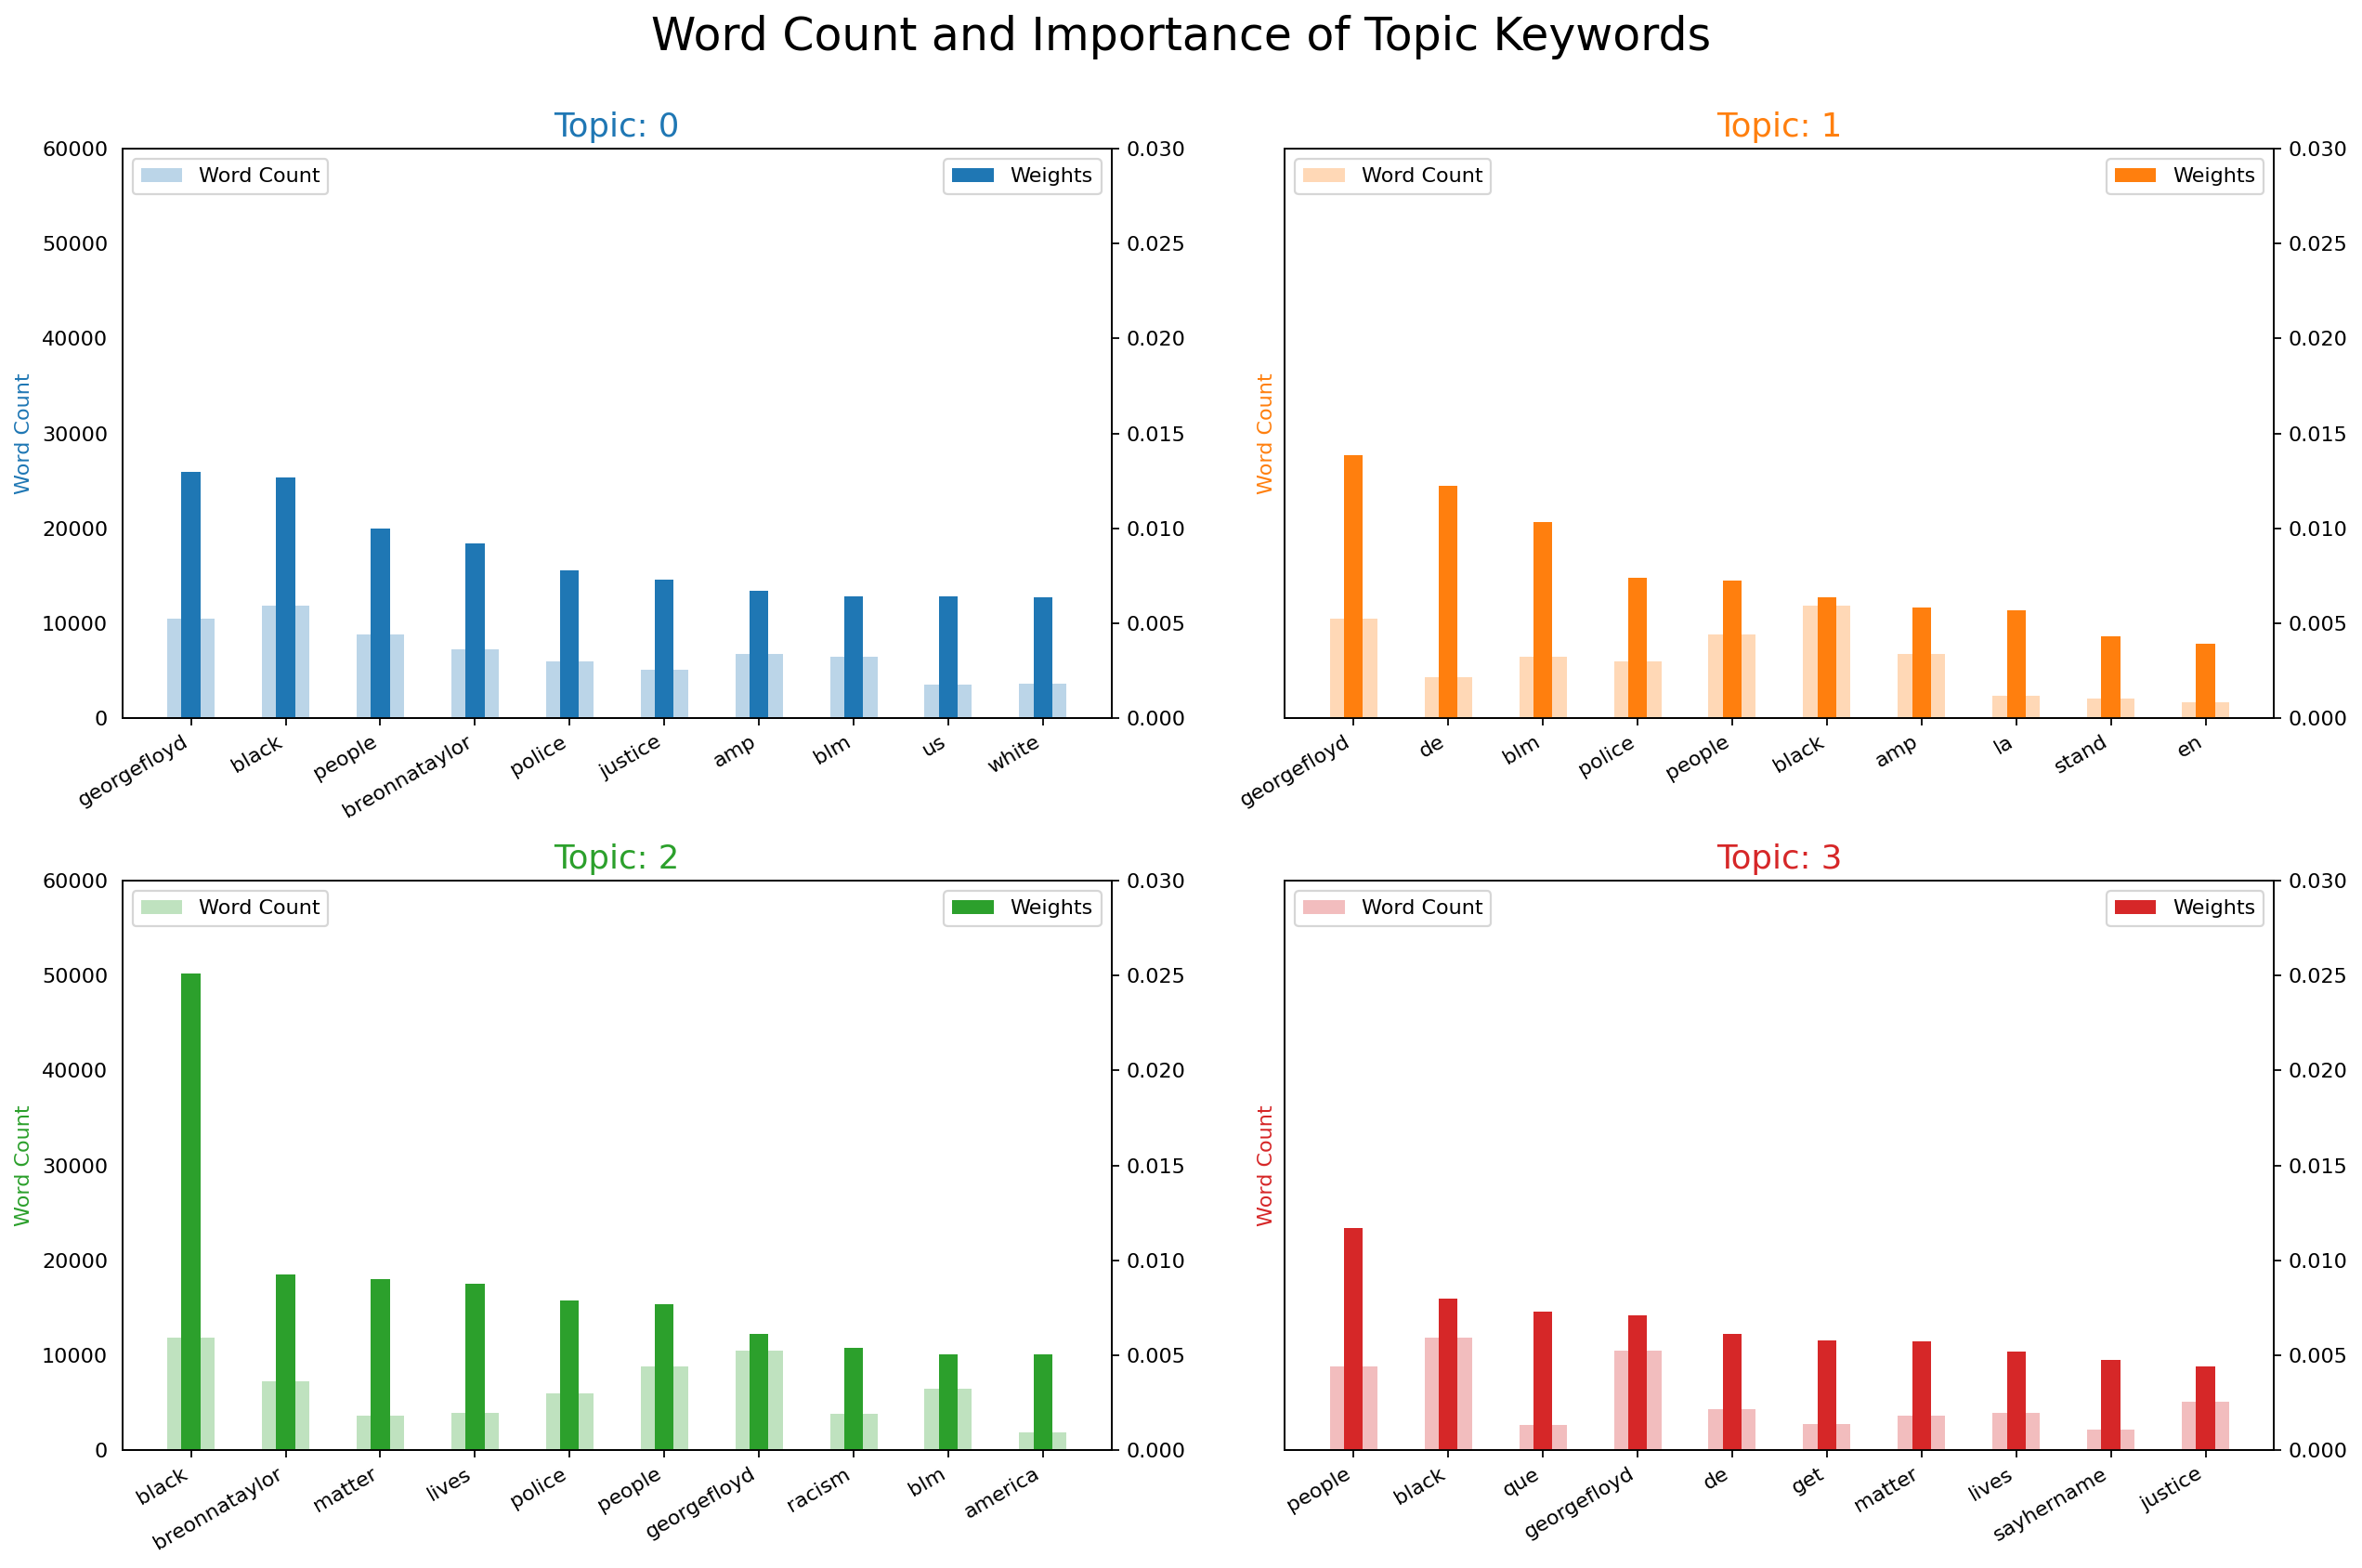

In [67]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 60000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()